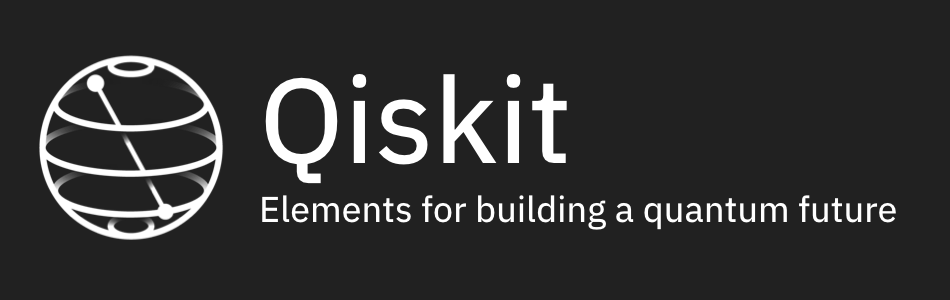

<div class="alert alert-block alert-info">
    <b>Important:</b> This notebook uses <code>ipywidgets</code> that take advantage of the javascript interface in a web browser.  The downside is the functionality does not render well on saved notebooks.  Run this notebook locally to see the widgets in action.
</div>

# Qiskit Jupyter Tools

Qiskit was designed to be used inside of the Jupyter notebook interface.  As such it includes many useful routines that take advantage of this platform, and make performing tasks like exploring devices and tracking job progress effortless.

Loading all the qiskit Jupyter goodness is done via:

In [1]:
from qiskit import *
import qiskit.providers.ibmq.jupyter  # This is the where the magic happens (literally).

## Table of contents

1) [IQX Dashboard](#dashboard)


2) [Backend Details](#details)


To start, load your IQX account information and select a provider:

In [2]:
IBMQ.load_account();

In [3]:
provider = IBMQ.get_provider(group='open')

## IQX Dashboard <a name="dashboard"></a>

Perhaps the most useful Jupyter tool is the `iqx_dashboard`.  This widget consists of a `Devices` tab and a `Jobs` tab. The `Devices` tab provides an overview of all the devices you have access to. The `Jobs` tab automatically tracks and displays information for the jobs submitted in this session.

To start the dashboard you run the Jupyter magic:

In [4]:
%iqx_dashboard

AccordionWithThread(children=(Tab(children=(Box(children=(VBox(layout=Layout(height='100%', width='740px')),),…

<IPython.core.display.Javascript object>

You should now see a small window titled "IQX Dashboard" in the upper left corner of the notebook. Click on the drop down symbol to see the two tabs. The `Devices` tab may take a few seconds to load as it needs to communicate with the server for device information. The `Jobs` tab should contain no job information as none has been submitted yet.

### Getting an Overview of Backends

The `Devices` tab provides an overview of all the backends you have access to. You can use it to compare, for example, the average CNOT error rates. In addition, the number of pending jobs on the devices is continuously being updated along with the operational status.

### Automatic Job Tracking

The `Jobs` tab automatically tracks and displays information for the jobs submitted in this session.

Now, let's submit a job to a device to see this in action:

In [5]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(simulator=False, filters=lambda b: b.configuration().n_qubits >= 5))

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])

mapped_circuit = transpile(qc, backend=backend)
job = backend.run(mapped_circuit, shots=1024)

Click on the `Jobs` tab and you will see that the job has been added to the list of jobs. Its status, queue position (if any), and estimated start time are being automatically tracked and updated. If the job is running, the scheduling mode for the job is also displayed. For example, if the job status is `RUNNING[F]`, that means the job is actively running and was scheduled using a fair-share algorithm. The button to the left of a job ID allows you to cancel the job. 

If you want to kill the dashboard you can do so by calling:

In [6]:
%disable_ibmq_dashboard

Although the dashboard itself is killed, the underlying framework is still tracking jobs for you and will show this information if loaded once again.

## Viewing Backend Details <a name="details"></a>

The IBM Quantum devices contain a large amount of configuration data and properties.  This information can be retrieved by calling:

In [7]:
config = backend.configuration()
params = backend.properties()

However, parsing through this information quickly becomes tedious.  Instead, all the information for a single backend can be displayed graphically by just calling the backend instance itself:

In [8]:
backend

Card(children=[Toolbar(children=[ToolbarTitle(children=['ibmq_belem @ (ibm-q/open/main)'], style_='color:whi…

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

This widget displays all the information about a backend in a single tabbed-window.

In [9]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright